# Task 4.2 - Keyword Analysis

### Steps

0. Preliminary Steps: Construct & Import Corpus
1. Process Tokens
2. Keyword Analysis
 - Visualize Top 25 Keywords in a Bar Chart
 - Visualize Top 25 Keywords in a Bar Chart, by Period
 - Time Series of Keyword Frequencies
 - Select Articles for Reading

# Import libraries & corpus

In [1]:
import pandas as pd
import os
import pickle

In [2]:
# paths
Ukraine_path = "C:/Users/Карина/OneDrive/Документы/4 th year/Computational Social Science/Ukraine_Text/"
results_path = "C:/Users/Карина/OneDrive/Рабочий стол/results/"

In [3]:
# corpus index file name
Ukraine_Linkedin_filename = "C:/Users/Карина/OneDrive/Документы/4 th year/Computational Social Science/Ukraine_JobPostings.xlsx"

In [4]:
# pickled tokens file name
pickled_tokens_filename = "doc_tokens_processed.pkl"

In [5]:
# import corpus index
# import corpus index
Ukraine_JobPostings = pd.read_excel(Ukraine_Linkedin_filename, header=0)
Ukraine_JobPostings.shape

(50, 8)

In [6]:
Ukraine_JobPostings[0:2]

,ID,Country,URL,Organization,Position,Job Description,Responsibilities,Job Requirements
0,1,Ukraine,https://www.linkedin.com/jobs/search/?currentJ...,LoopMe,Frontend Developer,As Frontend Engineer you will work closely wit...,Develop features and performance optimizat...,Good sense of humor\n Proactive attitud...
1,2,Ukraine,https://www.linkedin.com/jobs/view/3532114981/...,Token Metrics,Crypto Growth Hacker (Remote),Token Metrics is looking for an experienced Gr...,"Identifying, developing and optimizing growth ...","A bachelor's degree in marketing, strategy, bu..."


In [7]:
# import pickled doc_tokens_processed
pickled_file = open(pickled_tokens_filename,'rb')
pickled_stuff = pickle.load(pickled_file)


doc_ids = pickled_stuff[0]
doc_text = pickled_stuff[1]
doc_tokens_processed = pickled_stuff[2]

In [8]:
doc_ids

['Ukraine_3Shape',
 'Ukraine_airSlate',
 'Ukraine_Apptimized',
 'Ukraine_AttoTrading',
 'Ukraine_Ciklum',
 'Ukraine_Delasport',
 'Ukraine_Delasport\xa0',
 'Ukraine_EDB',
 'Ukraine_EDB1',
 'Ukraine_EJaw',
 'Ukraine_EPAMAnywhere',
 'Ukraine_FTDsolutions',
 'Ukraine_GlobaldevGroup',
 'Ukraine_GlobalLogic',
 'Ukraine_GunzillaGames',
 'Ukraine_IngeniousBuild',
 'Ukraine_Intellias',
 'Ukraine_JoyrideAutos',
 'Ukraine_KevuruGames',
 'Ukraine_LoopMe',
 'Ukraine_Luxoft',
 'Ukraine_MentorMate',
 'Ukraine_Newage',
 'Ukraine_NiX',
 'Ukraine_NiX1',
 'Ukraine_NiX3',
 'Ukraine_Nortal',
 'Ukraine_OnHires',
 'Ukraine_Optimove',
 'Ukraine_PerceptionBox',
 'Ukraine_PerceptionBox1',
 'Ukraine_PerfectScale',
 'Ukraine_PixelsMatter',
 'Ukraine_PlayMeStudio',
 'Ukraine_PlayQ',
 'Ukraine_Playtika',
 'Ukraine_RemotelyTalents',
 'Ukraine_RoomGroup',
 'Ukraine_ScholarshipOwl',
 'Ukraine_SeekingAlpha',
 'Ukraine_SigmaSoftwareGroup',
 'Ukraine_SIS',
 'Ukraine_SIS1',
 'Ukraine_SolutionMentors',
 'Ukraine_Synergetic

In [9]:
doc_text[45]

'Ukraine\tTide\xa0\tSenior Java Engineer\t"As a Senior Java Engineer at Tide you will be working on the designing, creating and running the rich product catalogue in one of our Business areas (e.g. Payments Service, Business Service). We have a long roadmap ahead of us and rarely run out of interesting problems to tackle. To make this a bit more specific you might be looking after some core payments tech like our Core Banking infrastructure for managing our ledger, accounts and cards, nurturing successful integrations with our multiple banking partners to support our global expansion in our new greenfield markets as well as working on more exotic features like our SEPA payments, Open Access/Open Banking, our in-house BNPL for SMEs, Accounting automation and much much more."\t"Defining, owning and maintaining the services your team owns from our service catalogue that fall in one of our domains (you design it, you build it, you run it, you scale it globally)Working with the product team

In [10]:
len(doc_tokens_processed[45])

251

In [11]:
doc_tokens_processed[45][0:10]

['ukraine',
 'tide',
 'senior',
 'java',
 'engineer',
 'senior',
 'java',
 'engineer',
 'tide',
 'working']

In [12]:
tokens = []

for doc_tokens in doc_tokens_processed:
    tokens += doc_tokens

len(tokens)

6908


# 2. Keyword Analysis

reference: http://damir.cavar.me/pynotebooks/Python_NLTK_Texts_and_Frequencies.html

In [13]:
# pip install nltk

In [14]:
import nltk
from nltk import FreqDist

In [15]:
# generate the frequency distribution of the tokens
freqdist = nltk.FreqDist(tokens)
len(freqdist)

2337

In [16]:
freqdist

FreqDist({'experience': 112, 'team': 96, 'development': 83, 'developer': 72, 'data': 65, 'design': 63, 'new': 54, 'game': 54, 'software': 52, 'year': 52, ...})

In [17]:
for x in freqdist:
    print(x, freqdist[x])

experience 112
team 96
development 83
developer 72
data 65
design 63
new 54
game 54
software 52
year 52
solution 50
product 50
engineer 49
technology 43
work 43
knowledge 41
working 39
ukraine 36
application 36
system 36
service 33
develop 33
business 32
looking 31
code 31
senior 28
skill 28
using 27
english 26
project 26
android 26
technical 25
integration 24
feature 24
support 22
user 22
programming 22
tool 22
web 22
strong 21
communication 21
part 21
developing 21
customer 21
join 20
java 20
client 20
understanding 20
engineering 19
mobile 19
platform 18
best 18
level 18
written 18
building 18
jira 18
including 17
improve 17
cloud 17
api 17
help 17
ability 17
practice 16
sql 16
language 16
pattern 16
full 16
existing 16
writing 15
testing 15
professional 15
company 15
management 15
environment 15
good 15
javascript 15
database 15
implementation 14
architecture 14
python 14
issue 14
responsible 14
complex 14
backend 14
dynamic 13
review 13
least 13
framework 13
build 13
problem 13
we

In [18]:
freqdist_tuples = [(x,freqdist[x]) for x in freqdist]
len(freqdist_tuples)

2337

In [19]:
freqdist_tuples

[('experience', 112),
 ('team', 96),
 ('development', 83),
 ('developer', 72),
 ('data', 65),
 ('design', 63),
 ('new', 54),
 ('game', 54),
 ('software', 52),
 ('year', 52),
 ('solution', 50),
 ('product', 50),
 ('engineer', 49),
 ('technology', 43),
 ('work', 43),
 ('knowledge', 41),
 ('working', 39),
 ('ukraine', 36),
 ('application', 36),
 ('system', 36),
 ('service', 33),
 ('develop', 33),
 ('business', 32),
 ('looking', 31),
 ('code', 31),
 ('senior', 28),
 ('skill', 28),
 ('using', 27),
 ('english', 26),
 ('project', 26),
 ('android', 26),
 ('technical', 25),
 ('integration', 24),
 ('feature', 24),
 ('support', 22),
 ('user', 22),
 ('programming', 22),
 ('tool', 22),
 ('web', 22),
 ('strong', 21),
 ('communication', 21),
 ('part', 21),
 ('developing', 21),
 ('customer', 21),
 ('join', 20),
 ('java', 20),
 ('client', 20),
 ('understanding', 20),
 ('engineering', 19),
 ('mobile', 19),
 ('platform', 18),
 ('best', 18),
 ('level', 18),
 ('written', 18),
 ('building', 18),
 ('jira', 1

In [20]:
# sort tuples by token frequency
freqdist_tuples.sort(key = lambda x: (-x[1],x[0]),reverse=False)

In [21]:
freqdist_tuples

[('experience', 112),
 ('team', 96),
 ('development', 83),
 ('developer', 72),
 ('data', 65),
 ('design', 63),
 ('game', 54),
 ('new', 54),
 ('software', 52),
 ('year', 52),
 ('product', 50),
 ('solution', 50),
 ('engineer', 49),
 ('technology', 43),
 ('work', 43),
 ('knowledge', 41),
 ('working', 39),
 ('application', 36),
 ('system', 36),
 ('ukraine', 36),
 ('develop', 33),
 ('service', 33),
 ('business', 32),
 ('code', 31),
 ('looking', 31),
 ('senior', 28),
 ('skill', 28),
 ('using', 27),
 ('android', 26),
 ('english', 26),
 ('project', 26),
 ('technical', 25),
 ('feature', 24),
 ('integration', 24),
 ('programming', 22),
 ('support', 22),
 ('tool', 22),
 ('user', 22),
 ('web', 22),
 ('communication', 21),
 ('customer', 21),
 ('developing', 21),
 ('part', 21),
 ('strong', 21),
 ('client', 20),
 ('java', 20),
 ('join', 20),
 ('understanding', 20),
 ('engineering', 19),
 ('mobile', 19),
 ('best', 18),
 ('building', 18),
 ('jira', 18),
 ('level', 18),
 ('platform', 18),
 ('written', 1

### 2.1 Visualize Top 10 Keywords in a Barplot

In [22]:
top10 = freqdist_tuples[0:10]
top10

[('experience', 112),
 ('team', 96),
 ('development', 83),
 ('developer', 72),
 ('data', 65),
 ('design', 63),
 ('game', 54),
 ('new', 54),
 ('software', 52),
 ('year', 52)]

In [23]:
top10_tokens = [x[0] for x in top10]
top10_counts = [x[1] for x in top10]

In [24]:
top10_tokens

['experience',
 'team',
 'development',
 'developer',
 'data',
 'design',
 'game',
 'new',
 'software',
 'year']

In [25]:
top10_counts

[112, 96, 83, 72, 65, 63, 54, 54, 52, 52]

In [26]:
# pip install numpy

In [27]:
# pip install matplotlib

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
fig = plt.figure(figsize = (10, 5))

<Figure size 1000x500 with 0 Axes>

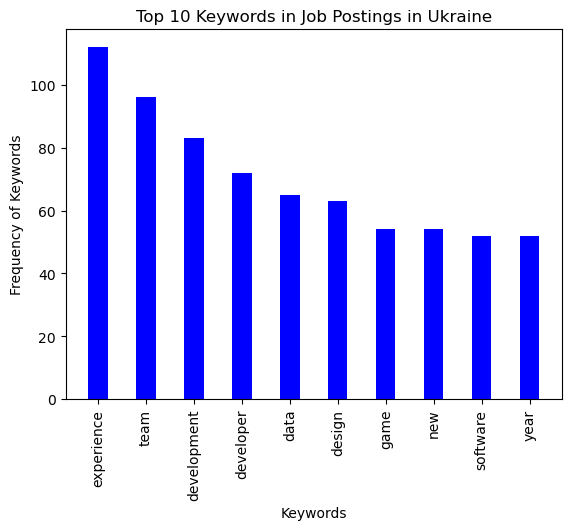

In [32]:
# creating the bar plot
plt.bar(top10_tokens, top10_counts, color ='blue', width = 0.4)
 
plt.xlabel("Keywords")
plt.xticks(rotation=90)
plt.ylabel("Frequency of Keywords")
plt.title("Top 10 Keywords in Job Postings in Ukraine")

# save the plot before showing
plt.savefig("results/top10_Ukraine.png",dpi=400)

plt.show()

In [34]:
v1_Ukraine = pd.DataFrame({"keywords": top10_tokens,
                 "counts": top10_counts})

In [35]:
v1_Ukraine

,keywords,counts
0,experience,112
1,team,96
2,development,83
3,developer,72
4,data,65
5,design,63
6,game,54
7,new,54
8,software,52
9,year,52


In [36]:
v1_Ukraine.to_excel("C:/Users/Карина/OneDrive/Рабочий стол/results/Top10_Ukraine.xlsx",index=False)

# Bonus: Visual Top Keywords in a Word Cloud

Python's wordcloud - https://www.datacamp.com/tutorial/wordcloud-python (requires Microsoft C++ Virtual)

Web-based app - https://www.wordclouds.com/

In [37]:
# pip install wordcloud

In [38]:
# from PIL import Image
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [39]:
import pandas as pd

In [40]:
# weight: top25_counts

In [41]:
# word: top25_tokens

In [42]:
# create color column

HEX color codes - https://htmlcolorcodes.com/

In [44]:
# choose some colors for the word cloud
purple = "#7D3C98".lower()
gold = "#F4D03F".lower()

In [45]:
# list of color hex codes. make sure it contains exacly 25 items 
top10_colors = [purple,gold] * 5
top10_colors

['#7d3c98',
 '#f4d03f',
 '#7d3c98',
 '#f4d03f',
 '#7d3c98',
 '#f4d03f',
 '#7d3c98',
 '#f4d03f',
 '#7d3c98',
 '#f4d03f']

In [46]:
# list of 25 url's
# if you insert urls here, they will appear as hyperlinks in the wordcloud
# ours will be null

top10_url = [""] * 10
top10_url

['', '', '', '', '', '', '', '', '', '']

In [47]:
dat = pd.DataFrame({"weight":top10_counts,"word":top10_tokens,"color":top10_colors,"url":top10_url})

In [48]:
dat

,weight,word,color,url
0,112,experience,#7d3c98,
1,96,team,#f4d03f,
2,83,development,#7d3c98,
3,72,developer,#f4d03f,
4,65,data,#7d3c98,
5,63,design,#f4d03f,
6,54,game,#7d3c98,
7,54,new,#f4d03f,
8,52,software,#7d3c98,
9,52,year,#f4d03f,


In [49]:
dat.dtypes

weight     int64
word      object
color     object
url       object
dtype: object

In [50]:
dat.to_csv("C:/Users/Карина/OneDrive/Рабочий стол/results/task4_wordcloud_data_Top10_Ukraine.csv",index=False)

https://www.wordclouds.com/

### 2.2 Compare Frequencies of Top Tokens over two types "Developer"

In [51]:
Ukraine_JobPostings

,ID,Country,URL,Organization,Position,Job Description,Responsibilities,Job Requirements
0,1,Ukraine,https://www.linkedin.com/jobs/search/?currentJ...,LoopMe,Frontend Developer,As Frontend Engineer you will work closely wit...,Develop features and performance optimizat...,Good sense of humor\n Proactive attitud...
1,2,Ukraine,https://www.linkedin.com/jobs/view/3532114981/...,Token Metrics,Crypto Growth Hacker (Remote),Token Metrics is looking for an experienced Gr...,"Identifying, developing and optimizing growth ...","A bachelor's degree in marketing, strategy, bu..."
2,3,Ukraine,https://www.linkedin.com/jobs/view/3542777004/...,N-iX,Trainee Data Engineer,We are looking for a motivated Trainee Data En...,Assist senior data engineers in developing and...,"Bachelor's degree in Computer Science, Informa..."
3,4,Ukraine,https://www.linkedin.com/jobs/view/3541980766/...,airSlate,Middle PHP developer,airSlate welcomes a talented Middle PHP develo...,Development and implementation of content gene...,2+ years of experience working with PHP progra...
4,5,Ukraine,https://www.linkedin.com/jobs/view/3516656459/...,INGENIOUS.BUILD,Back End Developer (Remote),We are looking for a talented Back End Develop...,"Collaborate with your team to plan, build, and...",PHP / Laravel.\nREST.\nRelational databases.\n...
5,6,Ukraine,https://www.linkedin.com/jobs/view/3534856320/...,Delasport,"Junior Java Developer (full-time office job, K...",Delasport is an iGaming Software company provi...,"Development of new business initiatives, exten...",1+ year of commercial programming experience u...
6,7,Ukraine,https://www.linkedin.com/jobs/view/3534574870/...,N-iX,Senior Angular Software Engineer,We are looking for a skilled Senior Angular So...,Development in JavaScript/Typescript/ HTML5/ C...,A programming background with 6 years + profes...
7,8,Ukraine,https://www.linkedin.com/jobs/view/3469089693/...,TITAN,Full Stack Developer,We are looking for an experienced and ambitiou...,"Plan, implement, and innovate features with cu...",>5 years as a full stack developer with Deep k...
8,9,Ukraine,https://www.linkedin.com/jobs/view/3550790711/...,KEVURU GAMES,Middle C++ Game Developer,All our employees choose what they are interes...,Unreal Engine Development;\nDesign and develop...,Minimum 4 years of C++ development;\nKnowledge...
9,10,Ukraine,https://www.linkedin.com/jobs/view/3532118313/...,Token Metrics,Crypto Full Stack Developer (Remote),Token Metrics is looking for a highly skilled ...,Developing front end website architecture\nDes...,Degree in Computer Science\nStrong organizatio...


In [52]:
doc_ids

['Ukraine_3Shape',
 'Ukraine_airSlate',
 'Ukraine_Apptimized',
 'Ukraine_AttoTrading',
 'Ukraine_Ciklum',
 'Ukraine_Delasport',
 'Ukraine_Delasport\xa0',
 'Ukraine_EDB',
 'Ukraine_EDB1',
 'Ukraine_EJaw',
 'Ukraine_EPAMAnywhere',
 'Ukraine_FTDsolutions',
 'Ukraine_GlobaldevGroup',
 'Ukraine_GlobalLogic',
 'Ukraine_GunzillaGames',
 'Ukraine_IngeniousBuild',
 'Ukraine_Intellias',
 'Ukraine_JoyrideAutos',
 'Ukraine_KevuruGames',
 'Ukraine_LoopMe',
 'Ukraine_Luxoft',
 'Ukraine_MentorMate',
 'Ukraine_Newage',
 'Ukraine_NiX',
 'Ukraine_NiX1',
 'Ukraine_NiX3',
 'Ukraine_Nortal',
 'Ukraine_OnHires',
 'Ukraine_Optimove',
 'Ukraine_PerceptionBox',
 'Ukraine_PerceptionBox1',
 'Ukraine_PerfectScale',
 'Ukraine_PixelsMatter',
 'Ukraine_PlayMeStudio',
 'Ukraine_PlayQ',
 'Ukraine_Playtika',
 'Ukraine_RemotelyTalents',
 'Ukraine_RoomGroup',
 'Ukraine_ScholarshipOwl',
 'Ukraine_SeekingAlpha',
 'Ukraine_SigmaSoftwareGroup',
 'Ukraine_SIS',
 'Ukraine_SIS1',
 'Ukraine_SolutionMentors',
 'Ukraine_Synergetic

In [53]:
doc_text[45]

'Ukraine\tTide\xa0\tSenior Java Engineer\t"As a Senior Java Engineer at Tide you will be working on the designing, creating and running the rich product catalogue in one of our Business areas (e.g. Payments Service, Business Service). We have a long roadmap ahead of us and rarely run out of interesting problems to tackle. To make this a bit more specific you might be looking after some core payments tech like our Core Banking infrastructure for managing our ledger, accounts and cards, nurturing successful integrations with our multiple banking partners to support our global expansion in our new greenfield markets as well as working on more exotic features like our SEPA payments, Open Access/Open Banking, our in-house BNPL for SMEs, Accounting automation and much much more."\t"Defining, owning and maintaining the services your team owns from our service catalogue that fall in one of our domains (you design it, you build it, you run it, you scale it globally)Working with the product team

In [54]:
group_keyword = "developer"

In [55]:
temp_id = doc_ids[0]

In [56]:
group_keyword in doc_text[doc_ids.index(temp_id)].lower()

True

In [57]:
# period1_ids = [idx for idx in doc_ids if idx < period_break]
type1_ids = [idx for idx in doc_ids if group_keyword in doc_text[doc_ids.index(idx)].lower()]
type1_ids

['Ukraine_3Shape',
 'Ukraine_airSlate',
 'Ukraine_Apptimized',
 'Ukraine_AttoTrading',
 'Ukraine_Ciklum',
 'Ukraine_Delasport',
 'Ukraine_Delasport\xa0',
 'Ukraine_EDB',
 'Ukraine_EDB1',
 'Ukraine_EJaw',
 'Ukraine_FTDsolutions',
 'Ukraine_GlobaldevGroup',
 'Ukraine_GlobalLogic',
 'Ukraine_GunzillaGames',
 'Ukraine_IngeniousBuild',
 'Ukraine_KevuruGames',
 'Ukraine_LoopMe',
 'Ukraine_Luxoft',
 'Ukraine_MentorMate',
 'Ukraine_NiX1',
 'Ukraine_Nortal',
 'Ukraine_OnHires',
 'Ukraine_Optimove',
 'Ukraine_PerceptionBox',
 'Ukraine_PerceptionBox1',
 'Ukraine_PixelsMatter',
 'Ukraine_Playtika',
 'Ukraine_RemotelyTalents',
 'Ukraine_RoomGroup',
 'Ukraine_ScholarshipOwl',
 'Ukraine_SeekingAlpha',
 'Ukraine_SigmaSoftwareGroup',
 'Ukraine_SIS1',
 'Ukraine_Synergetica',
 'Ukraine_Titan',
 'Ukraine_TokenMetrics1']

In [58]:
type2_ids = [idx for idx in doc_ids if group_keyword not in doc_text[doc_ids.index(idx)].lower()]
type2_ids

['Ukraine_EPAMAnywhere',
 'Ukraine_Intellias',
 'Ukraine_JoyrideAutos',
 'Ukraine_Newage',
 'Ukraine_NiX',
 'Ukraine_NiX3',
 'Ukraine_PerfectScale',
 'Ukraine_PlayMeStudio',
 'Ukraine_PlayQ',
 'Ukraine_SIS',
 'Ukraine_SolutionMentors',
 'Ukraine_Tide',
 'Ukraine_TokenMetrics',
 'Ukraine_TuneIn']

In [59]:
# token list for period 1

type1_tokens = []

for ids in type1_ids:
    type1_tokens += doc_tokens_processed[doc_ids.index(ids)]
    
len(type1_tokens)

4833

In [60]:
# token list for period 2

type2_tokens = []

for ids in type2_ids:
    type2_tokens += doc_tokens_processed[doc_ids.index(ids)]
    
len(type2_tokens)

2075

In [61]:
len(type1_tokens) + len(type2_tokens)

6908

In [62]:
len(tokens)

6908

In [63]:
# define fxn to generate the frequency distribution of a doc

def tokenfreqdist(tokens):

    freqdist = nltk.FreqDist(tokens)
    freqdist_tuples = [(x,freqdist[x]) for x in freqdist]
    freqdist_tuples.sort(key = lambda x: (-x[1],x[0]),reverse=False)
    return(freqdist_tuples)

In [64]:
freqdist_tuples1 = tokenfreqdist(type1_tokens)
freqdist_tuples1

[('experience', 84),
 ('development', 73),
 ('developer', 72),
 ('team', 66),
 ('software', 43),
 ('design', 40),
 ('year', 37),
 ('new', 36),
 ('technology', 34),
 ('application', 33),
 ('knowledge', 32),
 ('product', 32),
 ('solution', 32),
 ('work', 32),
 ('working', 29),
 ('code', 25),
 ('ukraine', 25),
 ('develop', 24),
 ('english', 23),
 ('game', 23),
 ('technical', 23),
 ('data', 22),
 ('service', 22),
 ('looking', 21),
 ('project', 21),
 ('business', 20),
 ('programming', 19),
 ('web', 19),
 ('jira', 18),
 ('part', 18),
 ('understanding', 18),
 ('using', 18),
 ('client', 17),
 ('feature', 17),
 ('skill', 17),
 ('strong', 17),
 ('communication', 16),
 ('customer', 16),
 ('engineer', 16),
 ('support', 16),
 ('system', 16),
 ('api', 15),
 ('language', 15),
 ('level', 15),
 ('mobile', 15),
 ('senior', 15),
 ('cloud', 14),
 ('existing', 14),
 ('full', 14),
 ('improve', 14),
 ('java', 14),
 ('javascript', 14),
 ('engineering', 13),
 ('good', 13),
 ('including', 13),
 ('integration', 

In [65]:
freqdist_tuples2 = tokenfreqdist(type2_tokens)
freqdist_tuples2

[('data', 43),
 ('engineer', 33),
 ('game', 31),
 ('team', 30),
 ('experience', 28),
 ('design', 23),
 ('system', 20),
 ('new', 18),
 ('product', 18),
 ('solution', 18),
 ('android', 16),
 ('year', 15),
 ('senior', 13),
 ('business', 12),
 ('integration', 11),
 ('service', 11),
 ('skill', 11),
 ('ukraine', 11),
 ('work', 11),
 ('best', 10),
 ('development', 10),
 ('looking', 10),
 ('working', 10),
 ('develop', 9),
 ('developing', 9),
 ('growth', 9),
 ('knowledge', 9),
 ('software', 9),
 ('technology', 9),
 ('tool', 9),
 ('user', 9),
 ('using', 9),
 ('join', 8),
 ('practice', 8),
 ('sap', 8),
 ('backend', 7),
 ('economy', 7),
 ('feature', 7),
 ('io', 7),
 ('opportunity', 7),
 ('pattern', 7),
 ('platform', 7),
 ('ability', 6),
 ('analysis', 6),
 ('building', 6),
 ('code', 6),
 ('complex', 6),
 ('degree', 6),
 ('engineering', 6),
 ('genesys', 6),
 ('help', 6),
 ('implementation', 6),
 ('java', 6),
 ('management', 6),
 ('sql', 6),
 ('strategy', 6),
 ('support', 6),
 ('various', 6),
 ('well

In [66]:
top10_tokens

['experience',
 'team',
 'development',
 'developer',
 'data',
 'design',
 'game',
 'new',
 'software',
 'year']

In [67]:
top10_counts1 = [0]*10
top10_counts2 = [0]*10

In [68]:
top10_counts1

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [69]:
freqdist_tuples1

[('experience', 84),
 ('development', 73),
 ('developer', 72),
 ('team', 66),
 ('software', 43),
 ('design', 40),
 ('year', 37),
 ('new', 36),
 ('technology', 34),
 ('application', 33),
 ('knowledge', 32),
 ('product', 32),
 ('solution', 32),
 ('work', 32),
 ('working', 29),
 ('code', 25),
 ('ukraine', 25),
 ('develop', 24),
 ('english', 23),
 ('game', 23),
 ('technical', 23),
 ('data', 22),
 ('service', 22),
 ('looking', 21),
 ('project', 21),
 ('business', 20),
 ('programming', 19),
 ('web', 19),
 ('jira', 18),
 ('part', 18),
 ('understanding', 18),
 ('using', 18),
 ('client', 17),
 ('feature', 17),
 ('skill', 17),
 ('strong', 17),
 ('communication', 16),
 ('customer', 16),
 ('engineer', 16),
 ('support', 16),
 ('system', 16),
 ('api', 15),
 ('language', 15),
 ('level', 15),
 ('mobile', 15),
 ('senior', 15),
 ('cloud', 14),
 ('existing', 14),
 ('full', 14),
 ('improve', 14),
 ('java', 14),
 ('javascript', 14),
 ('engineering', 13),
 ('good', 13),
 ('including', 13),
 ('integration', 

In [70]:
for top_token in top10_tokens:
    tuples = freqdist_tuples1.copy()
    while(tuples):
        tup = tuples.pop()
        if top_token == tup[0]:
            print(tup)
            top10_counts1[top10_tokens.index(top_token)] = tup[1]
            break

('experience', 84)
('team', 66)
('development', 73)
('developer', 72)
('data', 22)
('design', 40)
('game', 23)
('new', 36)
('software', 43)
('year', 37)


In [71]:
top10_counts1

[84, 66, 73, 72, 22, 40, 23, 36, 43, 37]

In [72]:
for top_token in top10_tokens:
    tuples = freqdist_tuples2.copy()
    while(tuples):
        tup = tuples.pop()
        if top_token == tup[0]:
            print(tup)
            top10_counts2[top10_tokens.index(top_token)] = tup[1]
            break

('experience', 28)
('team', 30)
('development', 10)
('data', 43)
('design', 23)
('game', 31)
('new', 18)
('software', 9)
('year', 15)


In [73]:
top10_counts2

[28, 30, 10, 0, 43, 23, 31, 18, 9, 15]

In [76]:
v2_Ukraine = pd.DataFrame({"Rank":range(1,11),
                   "Keyword": top10_tokens,
                 "Contains ''"+group_keyword.upper()+"''": top10_counts1,
                  "Does not contain ''"+group_keyword.upper()+"''": top10_counts2})

In [77]:
v2_Ukraine

,Rank,Keyword,Contains ''DEVELOPER'',Does not contain ''DEVELOPER''
0,1,experience,84,28
1,2,team,66,30
2,3,development,73,10
3,4,developer,72,0
4,5,data,22,43
5,6,design,40,23
6,7,game,23,31
7,8,new,36,18
8,9,software,43,9
9,10,year,37,15


In [79]:
v2_melted_Ukraine = pd.melt(v2_Ukraine,id_vars=["Rank","Keyword"],var_name="Group",value_name="Frequency").sort_values(["Rank","Group"])

In [80]:
v2_melted_Ukraine

,Rank,Keyword,Group,Frequency
0,1,experience,Contains ''DEVELOPER'',84
10,1,experience,Does not contain ''DEVELOPER'',28
1,2,team,Contains ''DEVELOPER'',66
11,2,team,Does not contain ''DEVELOPER'',30
2,3,development,Contains ''DEVELOPER'',73
12,3,development,Does not contain ''DEVELOPER'',10
3,4,developer,Contains ''DEVELOPER'',72
13,4,developer,Does not contain ''DEVELOPER'',0
4,5,data,Contains ''DEVELOPER'',22
14,5,data,Does not contain ''DEVELOPER'',43


In [82]:
v2_melted_Ukraine.to_excel("C:/Users/Карина/OneDrive/Рабочий стол/results/v2_melted_Ukraine"+group_keyword+".xlsx",index=False)

### Compare Frequencies of Top Tokens over two types "Manager"

In [83]:
Ukraine_JobPostings

,ID,Country,URL,Organization,Position,Job Description,Responsibilities,Job Requirements
0,1,Ukraine,https://www.linkedin.com/jobs/search/?currentJ...,LoopMe,Frontend Developer,As Frontend Engineer you will work closely wit...,Develop features and performance optimizat...,Good sense of humor\n Proactive attitud...
1,2,Ukraine,https://www.linkedin.com/jobs/view/3532114981/...,Token Metrics,Crypto Growth Hacker (Remote),Token Metrics is looking for an experienced Gr...,"Identifying, developing and optimizing growth ...","A bachelor's degree in marketing, strategy, bu..."
2,3,Ukraine,https://www.linkedin.com/jobs/view/3542777004/...,N-iX,Trainee Data Engineer,We are looking for a motivated Trainee Data En...,Assist senior data engineers in developing and...,"Bachelor's degree in Computer Science, Informa..."
3,4,Ukraine,https://www.linkedin.com/jobs/view/3541980766/...,airSlate,Middle PHP developer,airSlate welcomes a talented Middle PHP develo...,Development and implementation of content gene...,2+ years of experience working with PHP progra...
4,5,Ukraine,https://www.linkedin.com/jobs/view/3516656459/...,INGENIOUS.BUILD,Back End Developer (Remote),We are looking for a talented Back End Develop...,"Collaborate with your team to plan, build, and...",PHP / Laravel.\nREST.\nRelational databases.\n...
5,6,Ukraine,https://www.linkedin.com/jobs/view/3534856320/...,Delasport,"Junior Java Developer (full-time office job, K...",Delasport is an iGaming Software company provi...,"Development of new business initiatives, exten...",1+ year of commercial programming experience u...
6,7,Ukraine,https://www.linkedin.com/jobs/view/3534574870/...,N-iX,Senior Angular Software Engineer,We are looking for a skilled Senior Angular So...,Development in JavaScript/Typescript/ HTML5/ C...,A programming background with 6 years + profes...
7,8,Ukraine,https://www.linkedin.com/jobs/view/3469089693/...,TITAN,Full Stack Developer,We are looking for an experienced and ambitiou...,"Plan, implement, and innovate features with cu...",>5 years as a full stack developer with Deep k...
8,9,Ukraine,https://www.linkedin.com/jobs/view/3550790711/...,KEVURU GAMES,Middle C++ Game Developer,All our employees choose what they are interes...,Unreal Engine Development;\nDesign and develop...,Minimum 4 years of C++ development;\nKnowledge...
9,10,Ukraine,https://www.linkedin.com/jobs/view/3532118313/...,Token Metrics,Crypto Full Stack Developer (Remote),Token Metrics is looking for a highly skilled ...,Developing front end website architecture\nDes...,Degree in Computer Science\nStrong organizatio...


In [84]:
doc_ids

['Ukraine_3Shape',
 'Ukraine_airSlate',
 'Ukraine_Apptimized',
 'Ukraine_AttoTrading',
 'Ukraine_Ciklum',
 'Ukraine_Delasport',
 'Ukraine_Delasport\xa0',
 'Ukraine_EDB',
 'Ukraine_EDB1',
 'Ukraine_EJaw',
 'Ukraine_EPAMAnywhere',
 'Ukraine_FTDsolutions',
 'Ukraine_GlobaldevGroup',
 'Ukraine_GlobalLogic',
 'Ukraine_GunzillaGames',
 'Ukraine_IngeniousBuild',
 'Ukraine_Intellias',
 'Ukraine_JoyrideAutos',
 'Ukraine_KevuruGames',
 'Ukraine_LoopMe',
 'Ukraine_Luxoft',
 'Ukraine_MentorMate',
 'Ukraine_Newage',
 'Ukraine_NiX',
 'Ukraine_NiX1',
 'Ukraine_NiX3',
 'Ukraine_Nortal',
 'Ukraine_OnHires',
 'Ukraine_Optimove',
 'Ukraine_PerceptionBox',
 'Ukraine_PerceptionBox1',
 'Ukraine_PerfectScale',
 'Ukraine_PixelsMatter',
 'Ukraine_PlayMeStudio',
 'Ukraine_PlayQ',
 'Ukraine_Playtika',
 'Ukraine_RemotelyTalents',
 'Ukraine_RoomGroup',
 'Ukraine_ScholarshipOwl',
 'Ukraine_SeekingAlpha',
 'Ukraine_SigmaSoftwareGroup',
 'Ukraine_SIS',
 'Ukraine_SIS1',
 'Ukraine_SolutionMentors',
 'Ukraine_Synergetic

In [85]:
group_keyword= "manager"

In [86]:
temp_id1= doc_ids[10]

In [87]:
group_keyword in doc_text [doc_ids.index(temp_id1)].lower()

False

In [88]:
type3_ids = [idx for idx in doc_ids if group_keyword in doc_text[doc_ids.index(idx)].lower()]
type3_ids

['Ukraine_airSlate', 'Ukraine_EDB1', 'Ukraine_PlayMeStudio']

In [89]:
type4_ids = [idx for idx in doc_ids if group_keyword not in doc_text[doc_ids.index(idx)].lower()]
type4_ids

['Ukraine_3Shape',
 'Ukraine_Apptimized',
 'Ukraine_AttoTrading',
 'Ukraine_Ciklum',
 'Ukraine_Delasport',
 'Ukraine_Delasport\xa0',
 'Ukraine_EDB',
 'Ukraine_EJaw',
 'Ukraine_EPAMAnywhere',
 'Ukraine_FTDsolutions',
 'Ukraine_GlobaldevGroup',
 'Ukraine_GlobalLogic',
 'Ukraine_GunzillaGames',
 'Ukraine_IngeniousBuild',
 'Ukraine_Intellias',
 'Ukraine_JoyrideAutos',
 'Ukraine_KevuruGames',
 'Ukraine_LoopMe',
 'Ukraine_Luxoft',
 'Ukraine_MentorMate',
 'Ukraine_Newage',
 'Ukraine_NiX',
 'Ukraine_NiX1',
 'Ukraine_NiX3',
 'Ukraine_Nortal',
 'Ukraine_OnHires',
 'Ukraine_Optimove',
 'Ukraine_PerceptionBox',
 'Ukraine_PerceptionBox1',
 'Ukraine_PerfectScale',
 'Ukraine_PixelsMatter',
 'Ukraine_PlayQ',
 'Ukraine_Playtika',
 'Ukraine_RemotelyTalents',
 'Ukraine_RoomGroup',
 'Ukraine_ScholarshipOwl',
 'Ukraine_SeekingAlpha',
 'Ukraine_SigmaSoftwareGroup',
 'Ukraine_SIS',
 'Ukraine_SIS1',
 'Ukraine_SolutionMentors',
 'Ukraine_Synergetica',
 'Ukraine_Tide',
 'Ukraine_Titan',
 'Ukraine_TokenMetrics',

In [90]:
# token list for period 1

type3_tokens = []

for ids in type3_ids:
    type3_tokens += doc_tokens_processed[doc_ids.index(ids)]
    
len(type3_tokens)

429

In [91]:
# token list for period 2

type4_tokens = []

for ids in type4_ids:
    type4_tokens += doc_tokens_processed[doc_ids.index(ids)]
    
len(type4_tokens)

6479

In [92]:
len(type3_tokens) + len(type4_tokens)

6908

In [93]:
len(tokens)

6908

In [94]:
# define fxn to generate the frequency distribution of a doc

def tokenfreqdist(tokens):

    freqdist = nltk.FreqDist(tokens)
    freqdist_tuples = [(x,freqdist[x]) for x in freqdist]
    freqdist_tuples.sort(key = lambda x: (-x[1],x[0]),reverse=False)
    return(freqdist_tuples)

In [95]:
freqdist_tuples3 = tokenfreqdist(type3_tokens)
freqdist_tuples3

[('game', 23),
 ('team', 9),
 ('economy', 7),
 ('development', 6),
 ('php', 6),
 ('postgres', 6),
 ('project', 6),
 ('tool', 6),
 ('experience', 5),
 ('new', 5),
 ('content', 4),
 ('data', 4),
 ('developer', 4),
 ('open', 4),
 ('programming', 4),
 ('source', 4),
 ('analysis', 3),
 ('automation', 3),
 ('design', 3),
 ('designer', 3),
 ('develop', 3),
 ('maintain', 3),
 ('manager', 3),
 ('mobile', 3),
 ('one', 3),
 ('player', 3),
 ('python', 3),
 ('support', 3),
 ('working', 3),
 ('analyst', 2),
 ('balance', 2),
 ('become', 2),
 ('behavior', 2),
 ('community', 2),
 ('creating', 2),
 ('degree', 2),
 ('docker', 2),
 ('engineer', 2),
 ('feature', 2),
 ('framework', 2),
 ('generation', 2),
 ('git', 2),
 ('global', 2),
 ('implementation', 2),
 ('infrastructure', 2),
 ('interactive', 2),
 ('knowledge', 2),
 ('language', 2),
 ('laravel', 2),
 ('mechanic', 2),
 ('middle', 2),
 ('modeling', 2),
 ('newly', 2),
 ('part', 2),
 ('pipeline', 2),
 ('playme', 2),
 ('pricing', 2),
 ('product', 2),
 ('pro

In [96]:
freqdist_tuples4 = tokenfreqdist(type4_tokens)
freqdist_tuples4

[('experience', 107),
 ('team', 87),
 ('development', 77),
 ('developer', 68),
 ('data', 61),
 ('design', 60),
 ('software', 50),
 ('solution', 50),
 ('year', 50),
 ('new', 49),
 ('product', 48),
 ('engineer', 47),
 ('work', 42),
 ('technology', 41),
 ('knowledge', 39),
 ('application', 36),
 ('working', 36),
 ('system', 34),
 ('ukraine', 34),
 ('business', 32),
 ('game', 31),
 ('service', 31),
 ('code', 30),
 ('develop', 30),
 ('looking', 30),
 ('skill', 27),
 ('using', 27),
 ('android', 26),
 ('english', 26),
 ('senior', 26),
 ('technical', 25),
 ('integration', 24),
 ('feature', 22),
 ('user', 22),
 ('web', 22),
 ('developing', 21),
 ('client', 20),
 ('communication', 20),
 ('customer', 20),
 ('java', 20),
 ('project', 20),
 ('strong', 20),
 ('understanding', 20),
 ('join', 19),
 ('part', 19),
 ('support', 19),
 ('best', 18),
 ('building', 18),
 ('engineering', 18),
 ('jira', 18),
 ('level', 18),
 ('platform', 18),
 ('programming', 18),
 ('written', 18),
 ('api', 17),
 ('cloud', 17)

In [97]:
top10_tokens

['experience',
 'team',
 'development',
 'developer',
 'data',
 'design',
 'game',
 'new',
 'software',
 'year']

In [98]:
top10_counts1 = [0]*10
top10_counts2 = [0]*10

In [99]:
top10_counts1

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [100]:
freqdist_tuples3

[('game', 23),
 ('team', 9),
 ('economy', 7),
 ('development', 6),
 ('php', 6),
 ('postgres', 6),
 ('project', 6),
 ('tool', 6),
 ('experience', 5),
 ('new', 5),
 ('content', 4),
 ('data', 4),
 ('developer', 4),
 ('open', 4),
 ('programming', 4),
 ('source', 4),
 ('analysis', 3),
 ('automation', 3),
 ('design', 3),
 ('designer', 3),
 ('develop', 3),
 ('maintain', 3),
 ('manager', 3),
 ('mobile', 3),
 ('one', 3),
 ('player', 3),
 ('python', 3),
 ('support', 3),
 ('working', 3),
 ('analyst', 2),
 ('balance', 2),
 ('become', 2),
 ('behavior', 2),
 ('community', 2),
 ('creating', 2),
 ('degree', 2),
 ('docker', 2),
 ('engineer', 2),
 ('feature', 2),
 ('framework', 2),
 ('generation', 2),
 ('git', 2),
 ('global', 2),
 ('implementation', 2),
 ('infrastructure', 2),
 ('interactive', 2),
 ('knowledge', 2),
 ('language', 2),
 ('laravel', 2),
 ('mechanic', 2),
 ('middle', 2),
 ('modeling', 2),
 ('newly', 2),
 ('part', 2),
 ('pipeline', 2),
 ('playme', 2),
 ('pricing', 2),
 ('product', 2),
 ('pro

In [101]:

for top_token in top10_tokens:
    tuples = freqdist_tuples3.copy()
    while(tuples):
        tup = tuples.pop()
        if top_token == tup[0]:
            print(tup)
            top10_counts1[top10_tokens.index(top_token)] = tup[1]
            break

('experience', 5)
('team', 9)
('development', 6)
('developer', 4)
('data', 4)
('design', 3)
('game', 23)
('new', 5)
('software', 2)
('year', 2)


In [102]:
top10_counts1

[5, 9, 6, 4, 4, 3, 23, 5, 2, 2]

In [103]:
for top_token in top10_tokens:
    tuples = freqdist_tuples4.copy()
    while(tuples):
        tup = tuples.pop()
        if top_token == tup[0]:
            print(tup)
            top10_counts2[top10_tokens.index(top_token)] = tup[1]
            break

('experience', 107)
('team', 87)
('development', 77)
('developer', 68)
('data', 61)
('design', 60)
('game', 31)
('new', 49)
('software', 50)
('year', 50)


In [104]:
top10_counts2

[107, 87, 77, 68, 61, 60, 31, 49, 50, 50]

In [105]:
v3_Ukraine = pd.DataFrame({"Rank":range(1,11),
                   "Keyword": top10_tokens,
                 "Contains ''"+group_keyword.upper()+"''": top10_counts1,
                  "Does not contain ''"+group_keyword.upper()+"''": top10_counts2})

In [107]:
v3_Ukraine

,Rank,Keyword,Contains ''MANAGER'',Does not contain ''MANAGER''
0,1,experience,5,107
1,2,team,9,87
2,3,development,6,77
3,4,developer,4,68
4,5,data,4,61
5,6,design,3,60
6,7,game,23,31
7,8,new,5,49
8,9,software,2,50
9,10,year,2,50


In [108]:
v3_melted_Ukraine = pd.melt(v3_Ukraine,id_vars=["Rank","Keyword"],var_name="Group",value_name="Frequency").sort_values(["Rank","Group"])

In [109]:
v3_melted_Ukraine.to_excel("C:/Users/Карина/OneDrive/Рабочий стол/results/v3_melted_Ukraine"+group_keyword+".xlsx",index=False)

In [110]:
v3_melted_Ukraine

,Rank,Keyword,Group,Frequency
0,1,experience,Contains ''MANAGER'',5
10,1,experience,Does not contain ''MANAGER'',107
1,2,team,Contains ''MANAGER'',9
11,2,team,Does not contain ''MANAGER'',87
2,3,development,Contains ''MANAGER'',6
12,3,development,Does not contain ''MANAGER'',77
3,4,developer,Contains ''MANAGER'',4
13,4,developer,Does not contain ''MANAGER'',68
4,5,data,Contains ''MANAGER'',4
14,5,data,Does not contain ''MANAGER'',61


### 

### 2.3 Time Series of Selected Keyword Frequencies

In [212]:
selected_keywords = ["software","development","technology"]
selected_keywords

['software', 'development', 'technology']

In [213]:
t = list(range(2013,2023))
t

[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

In [214]:
# create time-series with 0 counts
ts = pd.DataFrame({"Year":t})

In [215]:
for k in selected_keywords:
    ts[k] = [0]*len(t)

In [216]:
ts = pd.melt(ts,id_vars="Year",var_name="Keyword",value_name="Frequency")

In [217]:
ts

,Year,Keyword,Frequency
0,2013,software,0
1,2014,software,0
2,2015,software,0
3,2016,software,0
4,2017,software,0
5,2018,software,0
6,2019,software,0
7,2020,software,0
8,2021,software,0
9,2022,software,0


In [218]:
Canada_JobPostings

,ID,Country,URL,Organization,Position,Job Description,Responsibilities,Job Requirements
0,1,Canada,https://www.linkedin.com/jobs/search/?currentJ...,Trapeze Group,Cloud Solution & Security Engineer,As a Cloud Solution & Security Engineer for ou...,Automate the delivery of Azure hosted client e...,3+ years of specific experience in an Azure De...
1,2,Canada,https://www.linkedin.com/jobs/search/?currentJ...,Kabam,Principal Infrastructure Engineer,"As a key leader of Kabam’s IT department, the ...",The Principal Infrastructure Engineer Is Prima...,"10+ years’ of experience in a similar role, pr..."
2,3,Canada,https://www.linkedin.com/jobs/search/?currentJ...,Cadillac Fairview,"Manager, Change Management","The Manager, Change Management will play a key...",No direct reports\nRegular liaising with stake...,"Degree (Post secondary) in a related field, pr..."
3,4,Canada,https://www.linkedin.com/jobs/search/?currentJ...,Fluor Corporation,Lead Control Systems Engineer,Fluor is one of Canada's top employers and is ...,The primary responsibilities of the Lead Contr...,Basic Job Requirements\n\nCandidates will poss...
4,5,Canada,https://www.linkedin.com/jobs/search/?currentJ...,Robert Half,Senior Back End Developer,We are seeking a skilled Senior Back-End Devel...,Design and develop efficient and scalable back...,Bachelor's or Master's degree in Computer Scie...
5,6,Canada,https://www.linkedin.com/jobs/search/?currentJ...,Linkus Group,Senior .NET Developer,We are looking for a senior .NET Developer. Th...,"Implementing WCF and REST Web services, Window...",Organizational and attention to detail\nExcell...
6,7,Canada,https://www.linkedin.com/jobs/search/?currentJ...,Applied Systems Canada,Software Developer (C# .NET),"Applied Systems, Inc., a worldwide leader in i...",Being accountable to your team members and the...,"Has the ability to work 100% remotely, or from..."
7,8,Canada,https://www.linkedin.com/jobs/search/?currentJ...,SearchLabs,Senior Software Developer (.NET),Leader in their industry in providing technolo...,Create backend solutions through complex proje...,6+ years of professional experience in Backend...
8,9,Canada,https://www.linkedin.com/jobs/search/?currentJ...,BeachHead,Database Developer/SSIS/C#,Working with one of the top financial clients ...,Develop and Test ETL software using Oracle PL/...,5 years of experience in C#/.NET and WPF progr...
9,10,Canada,https://www.linkedin.com/jobs/search/?currentJ...,Acumatica,"Software Developer (.NET, C#)",Acumatica is a leading provider of cloud busin...,Developing B2B Self-services functionality to ...,Business applications development on C#.NET an...


In [219]:
doc_ids

['Canada_Acumatica',
 'Canada_AppliedSystemsCanada',
 'Canada_BeachHead',
 'Canada_ClubRunner',
 'Canada_DAC',
 'Canada_FluorCorporation',
 'Canada_Kabam',
 'Canada_KlassCapital',
 'Canada_LinkusGroup',
 'Canada_Manager',
 'Canada_Mariner Innovations',
 'Canada_RedManTechnologyLLC',
 'Canada_RobertHalf',
 'Canada_SearchLabs',
 'Canada_TrapezeGroup']

In [221]:
nrows = Canada_JobPostings.shape[0]

for year in t:
    print(year)
    year_tokens = []

    # gather tokens for each year
    for i in range(0,nrows):
        row_year = int(Canada_JobPostings.iloc[i,list(Canada_JobPostings.columns).index("Date")].split(".")[0])
        if row_year == year:
            row_id = str(Canada_JobPostings.iloc[i,list(Canada_JobPostings.columns).index("Filename")])
            print("\t",row_id)
            row_index = doc_ids.index(row_id)
            row_tokens = doc_tokens_processed[row_index]
            year_tokens += row_tokens
            
    # update keyword frequencies by year
    for k in selected_keywords:
        k_year_count = year_tokens.count(k)
        ts.loc[(ts.Year==year) & (ts.Keyword==k),"Frequency"] = k_year_count

2013


ValueError: 'Date' is not in list

In [222]:
ts

,Year,Keyword,Frequency
0,2013,software,0
1,2014,software,0
2,2015,software,0
3,2016,software,0
4,2017,software,0
5,2018,software,0
6,2019,software,0
7,2020,software,0
8,2021,software,0
9,2022,software,0


In [223]:
ts.to_excel(results_path+"ts.xlsx")

### 2.4 Select Articles for Reading

In [224]:
year_of_interest = 2022

In [225]:
keyword_of_interest = "software"

In [226]:
doc_ids_of_interest = []

# gather tokens for each year
for i in range(0,nrows):
    row_year = int(Canada_JobPostings.iloc[i,list(Canada_JobPostings.columns).index("Date")].split(".")[0])
    
    if row_year == year_of_interest:
        row_id = str(cCanada_JobPostings.iloc[i,list(Canada_JobPosting.columns).index("Filename")])
        row_index = doc_ids.index(row_id)
        row_tokens = doc_tokens_processed[row_index]
        
        if keyword_of_interest in row_tokens:
                doc_ids_of_interest.append(row_id)

doc_ids_of_interest

ValueError: 'Date' is not in list

In [95]:
doc_texts_of_interest = []

for idx in doc_ids_of_interest:  

IndentationError: expected an indented block (2300228665.py, line 3)